# Import important functions and models

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#pip install missingno
import missingno as msno


from sklearn.model_selection import train_test_split

# Load dataset

In [ ]:
df = pd.read_csv('./data/marketing_campaign.csv',sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

In [ ]:
#return the statistical summary
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Process data

Data processing refers to a data mining technique to transform the raw data into a reable and efficient format.

## clean missing data

In [ ]:
#check the missing data
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:>

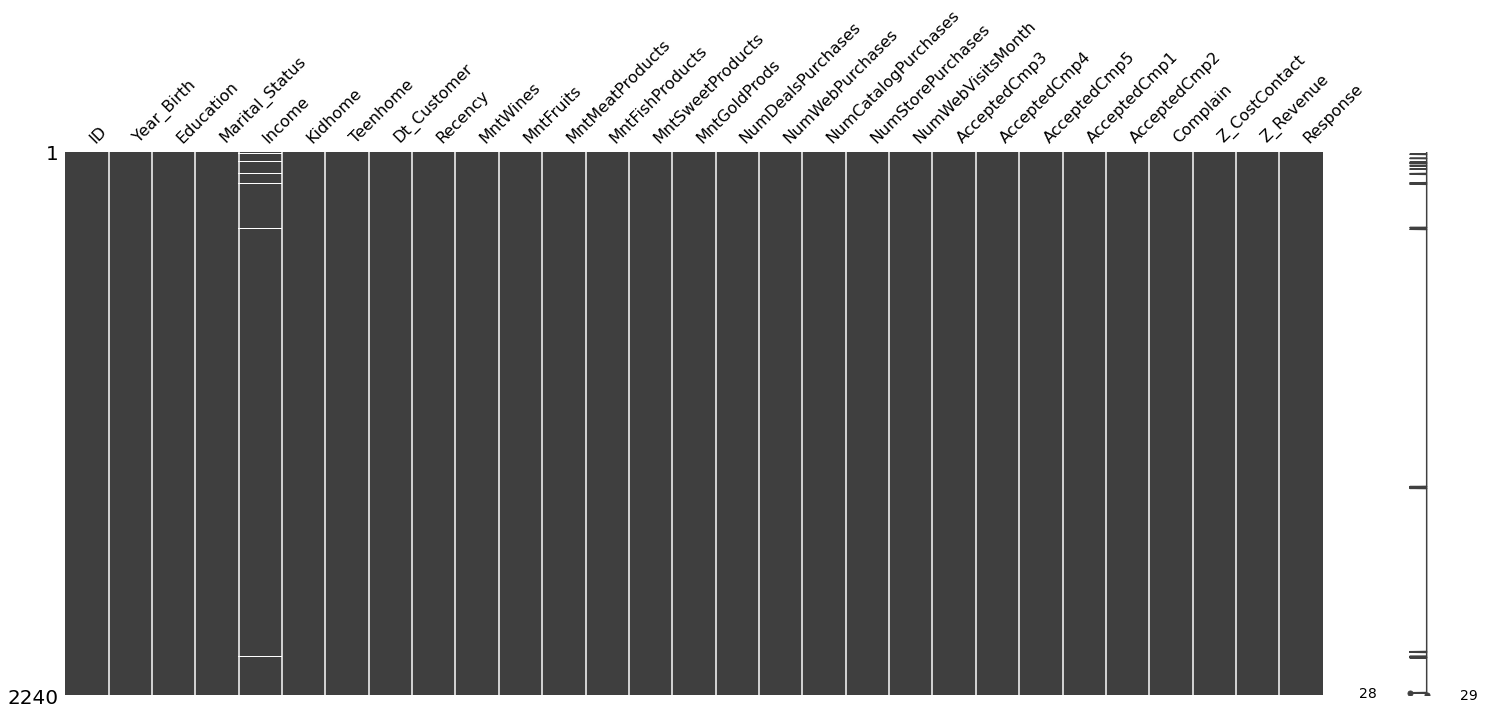

In [ ]:
#display the missing data using matrix plot
msno.matrix(df)

In [ ]:
#fill the missing data
df["Income"].fillna(df["Income"].median(),inplace=True)

<AxesSubplot:>

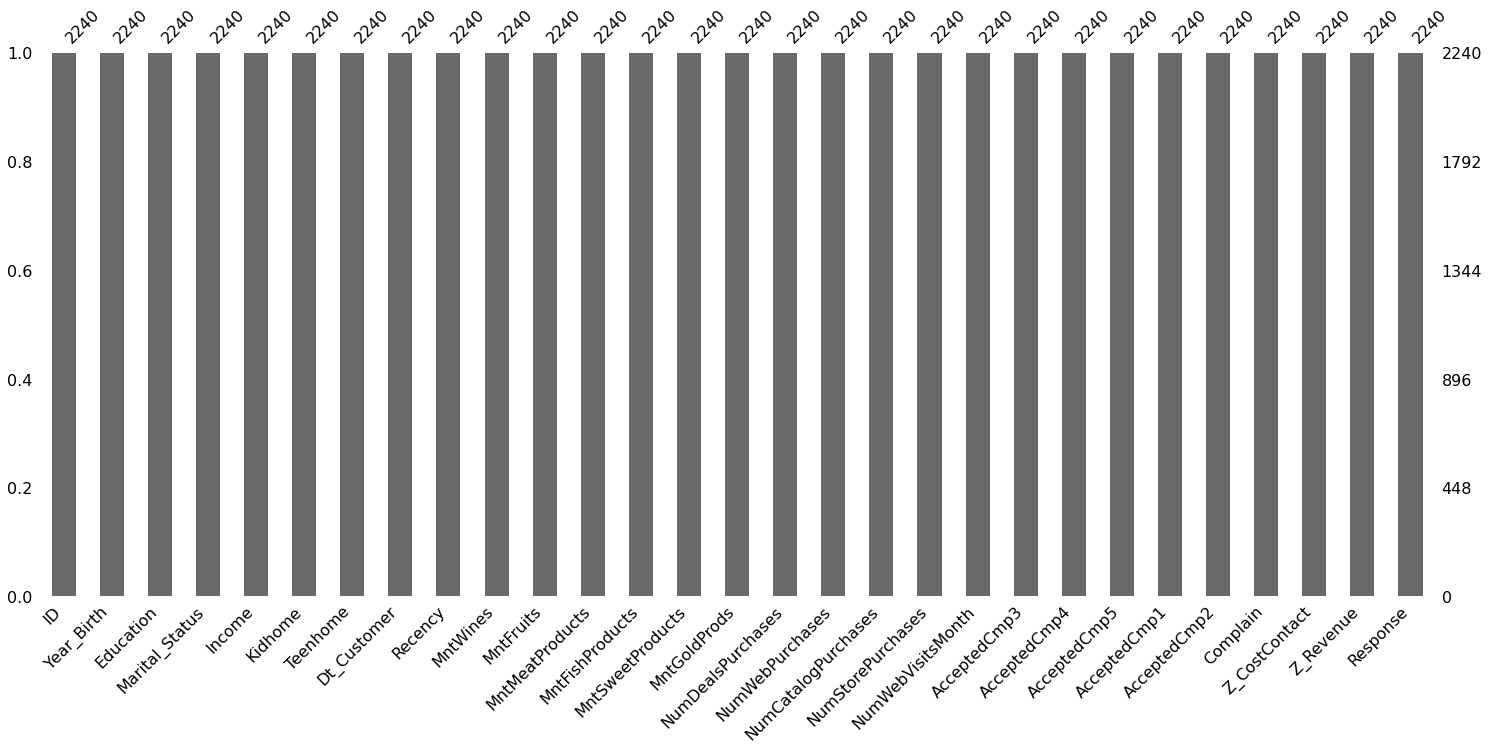

In [ ]:
#check the missing data using bar plot
msno.bar(df)

## data transformation

In [ ]:
# correct the data format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer']

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

# Feature Engineering
create 'Education_group', 'Marital_Status_group', 'Age', 'Age_group', 'Recency_group', 'MnProd', 'childnum', 'NumPurch'

In [ ]:
#check Education info
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
#segment Education level into four groups
df['Education_group']=df['Education'].replace({'2n Cycle':'Undergraduation','Basic':'Undergraduation'})
df['Education_group'].value_counts()

Graduation         1127
PhD                 486
Master              370
Undergraduation     257
Name: Education_group, dtype: int64

In [ ]:
#check the Marital_Status
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
#segment Marital_status into six groups
df['Marital_Status_group'] = df['Marital_Status'].replace({'Alone':'Single','Absurd':'Other','YOLO':'Other'})
df['Marital_Status_group'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Other         4
Name: Marital_Status_group, dtype: int64

In [ ]:
#age group
df['Age']=2022-df['Year_Birth']
df['Age'].value_counts()

46     89
51     87
47     83
50     79
44     77
52     77
49     74
57     74
53     71
48     69
66     55
64     53
43     53
70     52
45     52
54     51
63     51
56     50
68     50
67     49
62     49
40     45
59     45
55     44
60     44
65     43
71     43
39     42
36     42
58     42
42     39
41     39
38     38
61     36
69     35
37     32
33     30
73     30
72     29
34     29
35     27
74     21
32     18
76     16
75     16
31     15
30     13
77      8
79      7
78      7
29      5
27      5
28      3
26      2
123     1
81      1
129     1
122     1
82      1
Name: Age, dtype: int64

In [ ]:
#segment the age group
def age_group(age):
    if age < 20:
        return 'under 20'
    elif age <30:
        return '20s'
    elif age <40:
        return '30s'
    elif age <50:
        return '40s'
    elif age <60:
        return '50s'
    elif age <=70:
        return '60s'
    else: return 'over 70'

df['Age_group']=df['Age'].apply(age_group)
df['Age_group'].value_counts()

50s        620
40s        620
60s        517
30s        286
over 70    182
20s         15
Name: Age_group, dtype: int64

In [ ]:
#segment the recency
df['Recency'].value_counts()

56    37
30    32
54    32
46    31
92    30
      ..
41    15
59    14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

In [ ]:
def rece_group(rece):
    if rece <7:
        return 'under a week'
    elif rece <15:
        return 'under half month'
    elif rece <30:
        return 'under a month'
    elif rece <60:
        return 'under two months'
    elif rece <=90:
        return 'under three months'
    else: return 'over three month'

df['Recency_group']= df['Recency'].apply(rece_group)
df['Recency_group'].value_counts()

under three months    686
under two months      664
under a month         337
over three month      198
under half month      183
under a week          172
Name: Recency_group, dtype: int64

In [ ]:
#calculate the money spent on all products
df['MnProd']=(df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])
df['MnProd'].value_counts()

46      19
22      18
57      16
44      15
55      15
        ..
1345     1
764      1
368      1
292      1
843      1
Name: MnProd, Length: 1054, dtype: int64

In [ ]:
#calculate the number of children in customers'household
df['childnum'] = df['Kidhome']+df['Teenhome']
df['childnum'].value_counts()

1    1128
0     638
2     421
3      53
Name: childnum, dtype: int64

In [ ]:
#calculate the number of purchases
df['NumPurch']=(df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'])
df['NumPurch'].value_counts()

4     202
6     191
5     180
3     128
7     128
18    104
14    100
16     98
17     89
21     86
20     85
19     85
15     84
11     77
22     75
13     75
23     64
12     64
10     54
24     52
8      51
9      45
25     39
26     24
27     23
28     10
29      6
0       6
1       6
32      3
30      2
31      2
2       2
Name: NumPurch, dtype: int64

In [ ]:
#report data and store it into data folder
dirname = 'data/clean_data'
import os
if not os.path.exists(dirname):
    os.mkdir(dirname)

datname = 'data.csv'
file = os.path.join(dirname,datname)
df.to_csv(file)